<a href="https://colab.research.google.com/github/YashYI2003/Precision-Agriculture-using-Artificial-Intelligence/blob/main/copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import io

df = pd.read_csv('cleaned_dataset.csv')
df.head()


<ipython-input-15-98b50b8814e2>:4: DtypeWarning: Columns (8,10,14,23,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_dataset.csv')


,Record ID,PHI_MolConn_ID,IdentifierTypeOfProteinID,ProteinID,IdentifierTypeOfGeneLocusID,GeneLocusID,Genomic sequence providing strain,Gene_name,Pathogen_NCBI_species_Taxonomy ID,Pathogen_species,...,Full_citation,Author_email,Comments,Reference,Year_published,Curation details,File_name_pdf_files_provided,_batch_no_,Curation date,_curator_organisation_
0,Record ID,PHI_MolConn_ID,Protein ID source,Protein ID,Gene ID source,Gene ID,Sequence Strain,Gene,Pathogen ID,Pathogen species,...,Ref. detail,Author email,Comments,Author reference,Year,Curation details,File name,Batch no.,Curation date,Curator organization
1,Record 1,PHI:3,Uniprot,P26215,EMBL,AAA79885,SB111,PGN1,5017,Bipolaris zeicola,...,Phytopathology. 2015 Sep 14,ee2443@snu.ac.kr,Expression during all infection stages. pathog...,Scott-Craig et al.,1990,1 gene,Pensec-2015-Towards the identification of Type,PHI-base Vers.3.3,2000-05-10,Rres
2,Record 2,PHI:7,Uniprot,P22287,EMBL,CAA42824,race 5,AVR9,5499,Fulvia fulva,...,Phytopathology. 2015 Sep 14,ee2443@snu.ac.kr,no comments,Van Kan et al.,1991,1 gene,Pensec-2015-Towards the identification of Type,PHI-base Vers.3.3,2000-05-10,Rres
3,Record 3,PHI:12,UniProt,Q01886,EMBL,AAA33023,SB111,HTS1,5017,Bipolaris zeicola,...,Phytopathology. 2015 Sep 14,ee2443@snu.ac.kr,pathogen formerly called Cochliobolus carbonum...,Panaccione et al.,1992,1 gene,Pensec-2015-Towards the identification of Type,PHI-base Vers.3.3,2015-10-01,MC
4,Record 4,PHI:14,UniProt,P0C017,EMBL,AAB09711,clinical isolate,ADE2,5207,Cryptococcus neoformans,...,Phytopathology. 2015 Sep 14,ee2443@snu.ac.kr,no comments,Perfect et al.,1993,1 gene,Pensec-2015-Towards the identification of Type,PHI-base Vers.3.3,2015-10-01,MC


In [ ]:
# Assuming the DataFrame is already loaded as `df`

# Select the relevant columns for ML modeling
relevant_columns = [
    'Gene_name',
    'ProteinID',
    'GeneLocusID',
    'Function',
    'Phenotype_of_mutant',
    'Essential_gene_Lethal_knockout',
    'experimental_evidence',
    'Pathogen_species',
    'Pathogen_NCBI_species_Taxonomy ID',
    'Pathogen_NCBI_strain_Taxonomy_ID',
    'Host_descripton',
    'Experimental_host_species',
    'Host_NCBI_Taxonomy_ID',
    'Host_strain_genotype (MOVED this to new col 03/10/2016_or cultivar_taxonomy_ID_NCBI)',
    'tissue_type',
    'Disease_name'  # Target variable
]

# Filter the dataset
df_filtered = df[relevant_columns]

# Show first few rows
df_filtered.head()


,Gene_name,ProteinID,GeneLocusID,Function,Phenotype_of_mutant,Essential_gene_Lethal_knockout,experimental_evidence,Pathogen_species,Pathogen_NCBI_species_Taxonomy ID,Pathogen_NCBI_strain_Taxonomy_ID,Host_descripton,Experimental_host_species,Host_NCBI_Taxonomy_ID,Host_strain_genotype (MOVED this to new col 03/10/2016_or cultivar_taxonomy_ID_NCBI),tissue_type,Disease_name
0,Gene,Protein ID,Gene ID,Gene Function,Mutant Phenotype,Essential gene,Exp. Technique-stable,Pathogen species,Pathogen ID,Pathogen strain ID,Host description,Host species,Host ID,Host strain,Tissue,Disease
1,PGN1,P26215,AAA79885,Endopolygalacturonase,unaffected pathogenicity,no,Gene disruption,Bipolaris zeicola,5017,449239,Monocots,Zea mays (related: maize),4577,BALB/c,leaf,leaf spot
2,AVR9,P22287,CAA42824,Effector protein,effector (plant avirulence determinant),no,Gene deletion; gene complementation; biochemic...,Fulvia fulva,5499,449239,Eudicots,Solanum lycopersicum (related: tomato),4081,BALB/c,leaf,leaf mold
3,HTS1,Q01886,AAA33023,cylic peptide synthase,loss of pathogenicity,no,gene disruption,Bipolaris zeicola,5017,449239,monocots,Zea mays (related: maize),4577,BALB/c,leaf,leaf spot
4,ADE2,P0C017,AAB09711,phosphoribosylaminoimidazole carboxylase,reduced virulence,no,gene disruption; gene complementation,Cryptococcus neoformans,5207,235443,nematodes,Caenorhabditis elegans (related: roundworm),6239,BALB/c,leaf,cryptococcosis


In [ ]:
# Step 1: Save the filtered dataset to a new CSV file
df_filtered.to_csv('filtered_plant_disease_dataset.csv', index=False)

# Step 2: Download the CSV file
from google.colab import files
files.download('filtered_plant_disease_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,Record ID,PHI_MolConn_ID,IdentifierTypeOfProteinID,ProteinID,IdentifierTypeOfGeneLocusID,GeneLocusID,Genomic sequence providing strain,Gene_name,Pathogen_NCBI_species_Taxonomy ID,Pathogen_species,...,Full_citation,Author_email,Comments,Reference,Year_published,Curation details,File_name_pdf_files_provided,_batch_no_,Curation date,_curator_organisation_
0,Record ID,PHI_MolConn_ID,Protein ID source,Protein ID,Gene ID source,Gene ID,Sequence Strain,Gene,Pathogen ID,Pathogen species,...,Ref. detail,Author email,Comments,Author reference,Year,Curation details,File name,Batch no.,Curation date,Curator organization
1,Record 1,PHI:3,Uniprot,P26215,EMBL,AAA79885,SB111,PGN1,5017,Bipolaris zeicola,...,Phytopathology. 2015 Sep 14,ee2443@snu.ac.kr,Expression during all infection stages. pathog...,Scott-Craig et al.,1990,1 gene,Pensec-2015-Towards the identification of Type,PHI-base Vers.3.3,2000-05-10,Rres
2,Record 2,PHI:7,Uniprot,P22287,EMBL,CAA42824,race 5,AVR9,5499,Fulvia fulva,...,Phytopathology. 2015 Sep 14,ee2443@snu.ac.kr,no comments,Van Kan et al.,1991,1 gene,Pensec-2015-Towards the identification of Type,PHI-base Vers.3.3,2000-05-10,Rres
3,Record 3,PHI:12,UniProt,Q01886,EMBL,AAA33023,SB111,HTS1,5017,Bipolaris zeicola,...,Phytopathology. 2015 Sep 14,ee2443@snu.ac.kr,pathogen formerly called Cochliobolus carbonum...,Panaccione et al.,1992,1 gene,Pensec-2015-Towards the identification of Type,PHI-base Vers.3.3,2015-10-01,MC
4,Record 4,PHI:14,UniProt,P0C017,EMBL,AAB09711,clinical isolate,ADE2,5207,Cryptococcus neoformans,...,Phytopathology. 2015 Sep 14,ee2443@snu.ac.kr,no comments,Perfect et al.,1993,1 gene,Pensec-2015-Towards the identification of Type,PHI-base Vers.3.3,2015-10-01,MC


In [ ]:
# Remove the first row from the DataFrame
df_filtered = df_filtered.iloc[1:].reset_index(drop=True)

# Preview the cleaned DataFrame
df_filtered.head()


,Gene_name,ProteinID,GeneLocusID,Function,Phenotype_of_mutant,Essential_gene_Lethal_knockout,experimental_evidence,Pathogen_species,Pathogen_NCBI_species_Taxonomy ID,Pathogen_NCBI_strain_Taxonomy_ID,Host_descripton,Experimental_host_species,Host_NCBI_Taxonomy_ID,Host_strain_genotype (MOVED this to new col 03/10/2016_or cultivar_taxonomy_ID_NCBI),tissue_type,Disease_name
0,PGN1,P26215,AAA79885,Endopolygalacturonase,unaffected pathogenicity,no,Gene disruption,Bipolaris zeicola,5017,449239,Monocots,Zea mays (related: maize),4577,BALB/c,leaf,leaf spot
1,AVR9,P22287,CAA42824,Effector protein,effector (plant avirulence determinant),no,Gene deletion; gene complementation; biochemic...,Fulvia fulva,5499,449239,Eudicots,Solanum lycopersicum (related: tomato),4081,BALB/c,leaf,leaf mold
2,HTS1,Q01886,AAA33023,cylic peptide synthase,loss of pathogenicity,no,gene disruption,Bipolaris zeicola,5017,449239,monocots,Zea mays (related: maize),4577,BALB/c,leaf,leaf spot
3,ADE2,P0C017,AAB09711,phosphoribosylaminoimidazole carboxylase,reduced virulence,no,gene disruption; gene complementation,Cryptococcus neoformans,5207,235443,nematodes,Caenorhabditis elegans (related: roundworm),6239,BALB/c,leaf,cryptococcosis
4,ADE2,P0C017,AAB09711,phosphoribosylaminoimidazole carboxylase,loss of pathogenicity,no,gene disruption; gene complementation,Cryptococcus neoformans,5207,235443,rabbits and hares,Oryctolagus cuniculus (related: rabbit),9986,BALB/c,leaf,cryptococcosis


In [ ]:
df_cleaned = df_filtered.copy()


In [ ]:
df_cleaned.head()

,Gene_name,ProteinID,GeneLocusID,Function,Phenotype_of_mutant,Essential_gene_Lethal_knockout,experimental_evidence,Pathogen_species,Pathogen_NCBI_species_Taxonomy ID,Pathogen_NCBI_strain_Taxonomy_ID,Host_descripton,Experimental_host_species,Host_NCBI_Taxonomy_ID,Host_strain_genotype (MOVED this to new col 03/10/2016_or cultivar_taxonomy_ID_NCBI),tissue_type,Disease_name
0,PGN1,P26215,AAA79885,Endopolygalacturonase,unaffected pathogenicity,no,Gene disruption,Bipolaris zeicola,5017,449239,Monocots,Zea mays (related: maize),4577,BALB/c,leaf,leaf spot
1,AVR9,P22287,CAA42824,Effector protein,effector (plant avirulence determinant),no,Gene deletion; gene complementation; biochemic...,Fulvia fulva,5499,449239,Eudicots,Solanum lycopersicum (related: tomato),4081,BALB/c,leaf,leaf mold
2,HTS1,Q01886,AAA33023,cylic peptide synthase,loss of pathogenicity,no,gene disruption,Bipolaris zeicola,5017,449239,monocots,Zea mays (related: maize),4577,BALB/c,leaf,leaf spot
3,ADE2,P0C017,AAB09711,phosphoribosylaminoimidazole carboxylase,reduced virulence,no,gene disruption; gene complementation,Cryptococcus neoformans,5207,235443,nematodes,Caenorhabditis elegans (related: roundworm),6239,BALB/c,leaf,cryptococcosis
4,ADE2,P0C017,AAB09711,phosphoribosylaminoimidazole carboxylase,loss of pathogenicity,no,gene disruption; gene complementation,Cryptococcus neoformans,5207,235443,rabbits and hares,Oryctolagus cuniculus (related: rabbit),9986,BALB/c,leaf,cryptococcosis


In [ ]:
int_columns = [
    'Pathogen_NCBI_species_Taxonomy ID',
    'Pathogen_NCBI_strain_Taxonomy_ID',
    'Host_NCBI_Taxonomy_ID'
]


In [ ]:
df_cleaned[int_columns].isnull().sum()


,0
Pathogen_NCBI_species_Taxonomy ID,0
Pathogen_NCBI_strain_Taxonomy_ID,0
Host_NCBI_Taxonomy_ID,0


In [ ]:
# Columns to convert to integer
int_columns = [
    'Pathogen_NCBI_species_Taxonomy ID',
    'Pathogen_NCBI_strain_Taxonomy_ID',
    'Host_NCBI_Taxonomy_ID'
]

# Make a fresh copy to avoid modifying the original
df_cleaned = df_filtered.copy()

# Dictionary to record placeholder mappings
missing_value_map = {}

# Step 1: Convert integer columns safely
for col in int_columns:
    missing_value_map[col] = {'missing_placeholder': -1}

    # Convert to numeric (if values are string or float), set errors to NaN
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

    # Replace missing or bad values with -1
    df_cleaned[col] = df_cleaned[col].fillna(-1).astype(int)

# Step 2: Convert all other columns to string type
other_columns = df_cleaned.columns.difference(int_columns)

for col in other_columns:
    # Fill missing with "Unknown" first
    df_cleaned[col] = df_cleaned[col].fillna("Unknown")
    missing_value_map[col] = {'missing_placeholder': 'Unknown'}

    # Convert to string
    df_cleaned[col] = df_cleaned[col].astype(str)


In [ ]:
df_filtered.head()

,Gene_name,ProteinID,GeneLocusID,Function,Phenotype_of_mutant,Essential_gene_Lethal_knockout,experimental_evidence,Pathogen_species,Pathogen_NCBI_species_Taxonomy ID,Pathogen_NCBI_strain_Taxonomy_ID,Host_descripton,Experimental_host_species,Host_NCBI_Taxonomy_ID,Host_strain_genotype (MOVED this to new col 03/10/2016_or cultivar_taxonomy_ID_NCBI),tissue_type,Disease_name
0,PGN1,P26215,AAA79885,Endopolygalacturonase,unaffected pathogenicity,no,Gene disruption,Bipolaris zeicola,5017,449239,Monocots,Zea mays (related: maize),4577,BALB/c,leaf,leaf spot
1,AVR9,P22287,CAA42824,Effector protein,effector (plant avirulence determinant),no,Gene deletion; gene complementation; biochemic...,Fulvia fulva,5499,449239,Eudicots,Solanum lycopersicum (related: tomato),4081,BALB/c,leaf,leaf mold
2,HTS1,Q01886,AAA33023,cylic peptide synthase,loss of pathogenicity,no,gene disruption,Bipolaris zeicola,5017,449239,monocots,Zea mays (related: maize),4577,BALB/c,leaf,leaf spot
3,ADE2,P0C017,AAB09711,phosphoribosylaminoimidazole carboxylase,reduced virulence,no,gene disruption; gene complementation,Cryptococcus neoformans,5207,235443,nematodes,Caenorhabditis elegans (related: roundworm),6239,BALB/c,leaf,cryptococcosis
4,ADE2,P0C017,AAB09711,phosphoribosylaminoimidazole carboxylase,loss of pathogenicity,no,gene disruption; gene complementation,Cryptococcus neoformans,5207,235443,rabbits and hares,Oryctolagus cuniculus (related: rabbit),9986,BALB/c,leaf,cryptococcosis


In [ ]:
# Check dtypes
print(df_cleaned.dtypes)

# Check for any remaining missing values
print("\nMissing values:\n", df_cleaned.isnull().sum().sum())  # should be 0


Gene_name                                                                               object
ProteinID                                                                               object
GeneLocusID                                                                             object
Function                                                                                object
Phenotype_of_mutant                                                                     object
Essential_gene_Lethal_knockout                                                          object
experimental_evidence                                                                   object
Pathogen_species                                                                        object
Pathogen_NCBI_species_Taxonomy ID                                                        int64
Pathogen_NCBI_strain_Taxonomy_ID                                                         int64
Host_descripton                                   

In [ ]:
# Step 1: Save the filtered dataset to a new CSV file
df_filtered.to_csv('latest_one.csv', index=False)

# Step 2: Download the CSV file
from google.colab import files
files.download('latest_one.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Store all mappings
encoding_maps = {}

# Go through each non-integer column
for col in df_cleaned.columns:
    if col not in int_columns:
        le = LabelEncoder()

        # Fit and transform the column
        df_cleaned[col] = le.fit_transform(df_cleaned[col])

        # Save mapping: class_ to original string
        encoding_maps[col] = {
            'string_to_code': dict(zip(le.classes_, le.transform(le.classes_))),
            'code_to_string': dict(zip(le.transform(le.classes_), le.classes_))
        }


In [ ]:
# Example mapping for 'Gene_name'
print("Mapping for Gene_name:")
print(encoding_maps['Gene_name'])

# Preview encoded data
df_cleaned.head()


Mapping for Gene_name:
{'string_to_code': {'(Bud32)': np.int64(0), '(Gsk3)': np.int64(1), '(Mgv1)': np.int64(2), '(O-methylsterigmatocystin oxidoreductase)': np.int64(3), '(Sc Atg1)': np.int64(4), '(Sc Bck1)': np.int64(5), '(Sc CDC15)': np.int64(6), '(Sc Cak1)': np.int64(7), '(Sc Cbk1)': np.int64(8), '(Sc Cdc15)': np.int64(9), '(Sc Cdc28)': np.int64(10), '(Sc Cla4)': np.int64(11), '(Sc Cmk1/Cmk2)': np.int64(12), '(Sc Ctk1)': np.int64(13), '(Sc Dbf2/Dbf20)': np.int64(14), '(Sc Gin4-like)': np.int64(15), '(Sc Kic1)': np.int64(16), '(Sc Mec1)': np.int64(17), '(Sc Pbs2)': np.int64(18), '(Sc Prr2)': np.int64(19), '(Sc Rim15)': np.int64(20), '(Sc Sak1)': np.int64(21), '(Sc Sat4)': np.int64(22), '(Sc Sch9)': np.int64(23), '(Sc Sky1)': np.int64(24), '(Sc Srb10)': np.int64(25), '(Sc Ssk2/Ssk22)': np.int64(26), '(Sc Ste11)': np.int64(27), '(Sc Ste7)': np.int64(28), '(Sc Swe1)': np.int64(29), '(Sc Tpk2)': np.int64(30), '(Sc Yck1/2/3)': np.int64(31), '(Snf1)': np.int64(32), '(Sp Prp4)': np.int64(3

,Gene_name,ProteinID,GeneLocusID,Function,Phenotype_of_mutant,Essential_gene_Lethal_knockout,experimental_evidence,Pathogen_species,Pathogen_NCBI_species_Taxonomy ID,Pathogen_NCBI_strain_Taxonomy_ID,Host_descripton,Experimental_host_species,Host_NCBI_Taxonomy_ID,Host_strain_genotype (MOVED this to new col 03/10/2016_or cultivar_taxonomy_ID_NCBI),tissue_type,Disease_name
0,4826,6255,155,414,8,0,1,25,5017,449239,1,273,4577,49,437,302
1,245,6235,4608,412,2,0,0,109,5499,449239,0,234,4081,49,437,295
2,3394,6608,105,1936,6,0,74,25,5017,449239,26,273,4577,49,437,302
3,89,6094,191,3772,7,0,77,90,5207,235443,29,42,6239,49,437,177
4,89,6094,191,3772,6,0,77,90,5207,235443,32,172,9986,49,437,177


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set theme
sns.set(style="whitegrid")


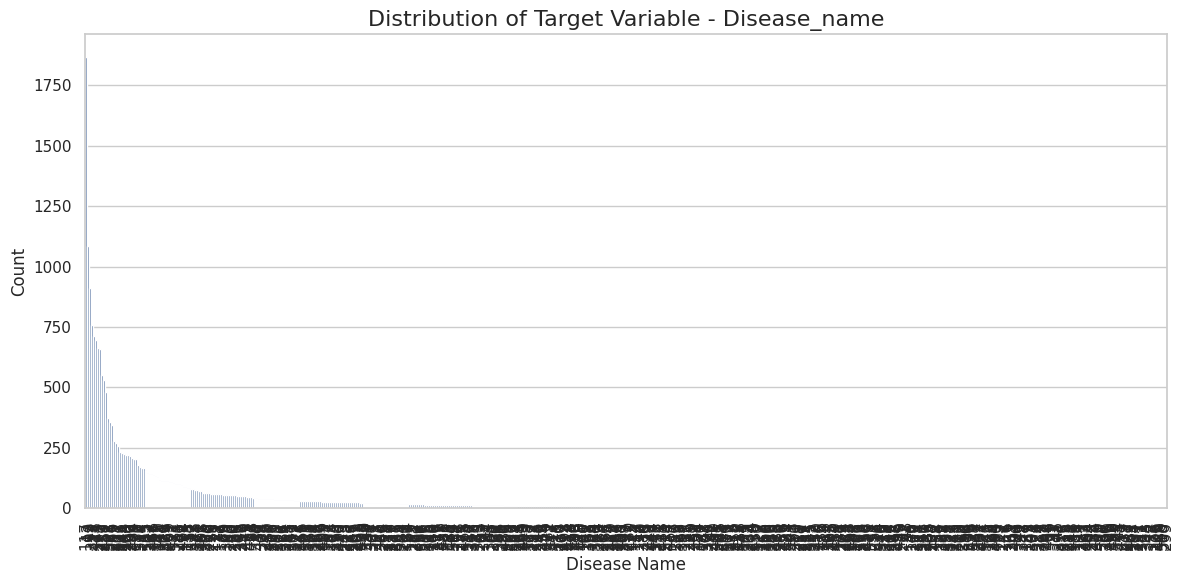

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Disease_name', data=df_cleaned, order=df_cleaned['Disease_name'].value_counts().index)
plt.title('Distribution of Target Variable - Disease_name', fontsize=16)
plt.xlabel('Disease Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


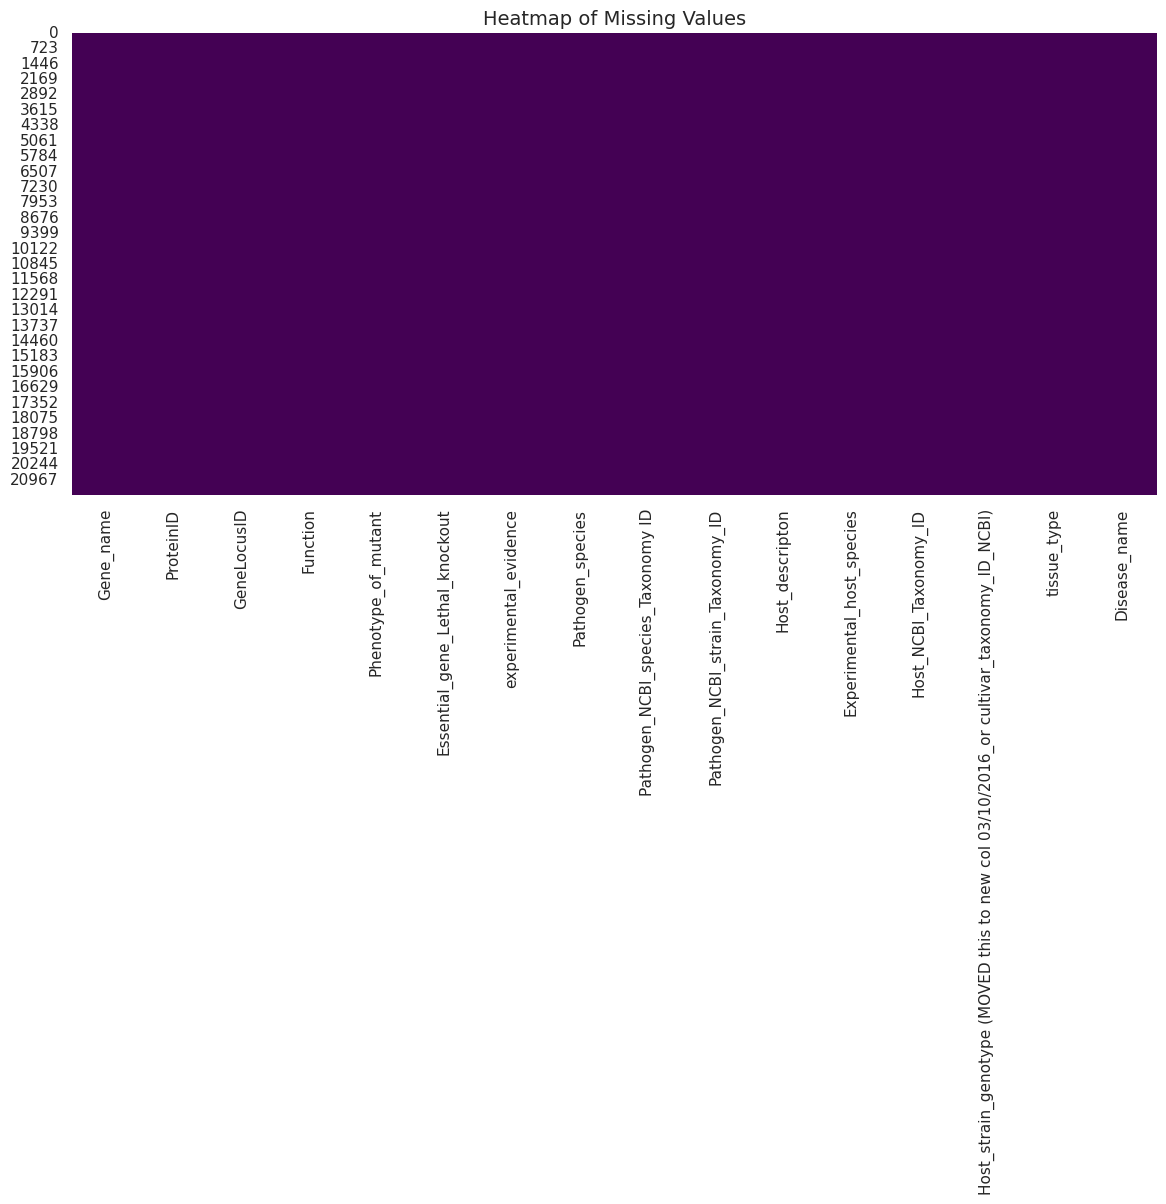

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values", fontsize=14)
plt.show()


<ipython-input-34-fb0e4fc72884>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")


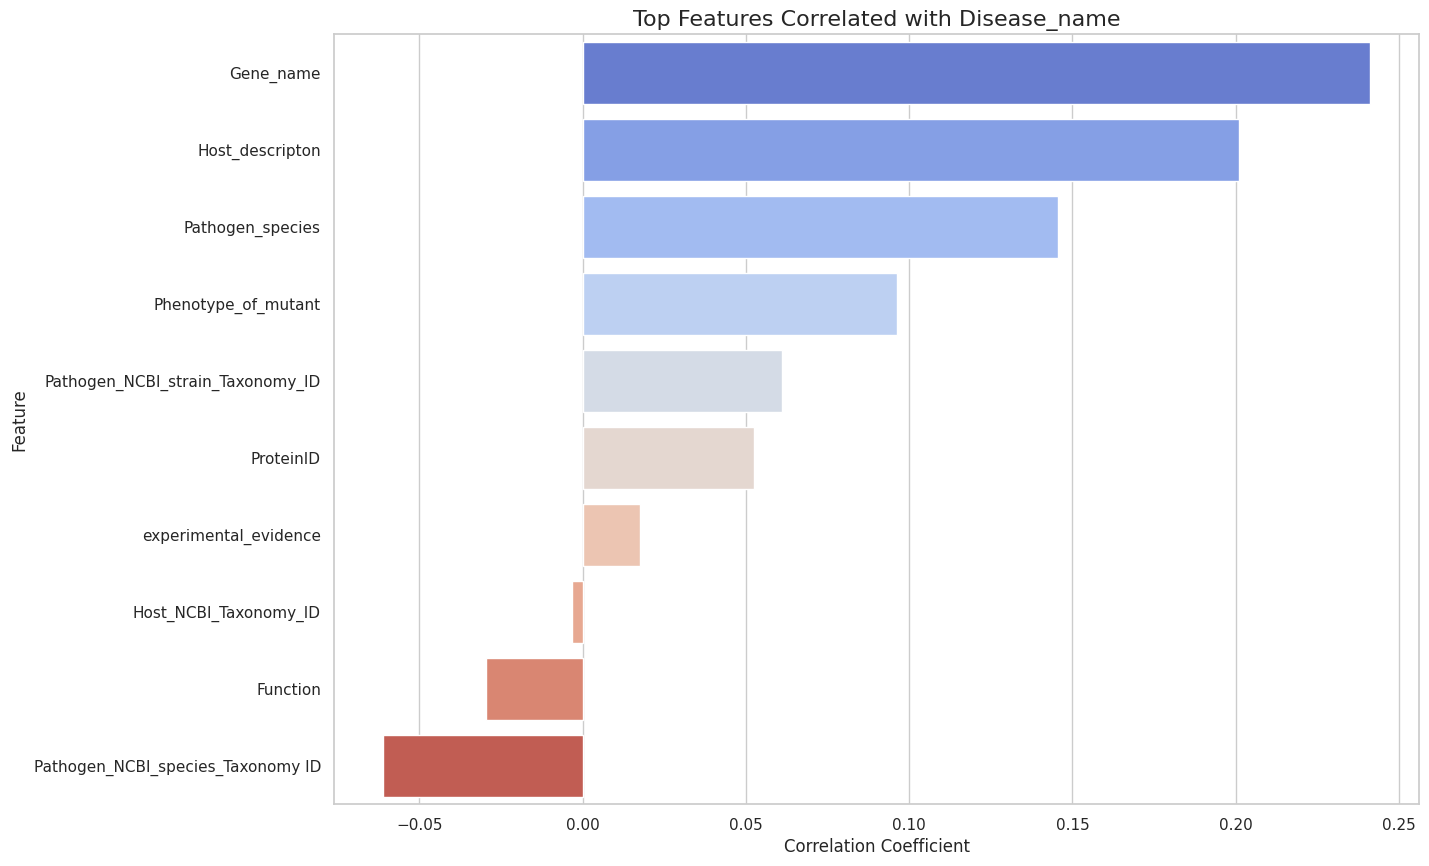

In [ ]:
plt.figure(figsize=(14, 10))
corr_matrix = df_cleaned.corr(numeric_only=True)

# Correlation of all columns with Disease_name
corr_target = corr_matrix['Disease_name'].sort_values(ascending=False)

# Top 10 correlated features (excluding Disease_name itself)
top_corr = corr_target.drop('Disease_name').head(10)

sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")
plt.title('Top Features Correlated with Disease_name', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()


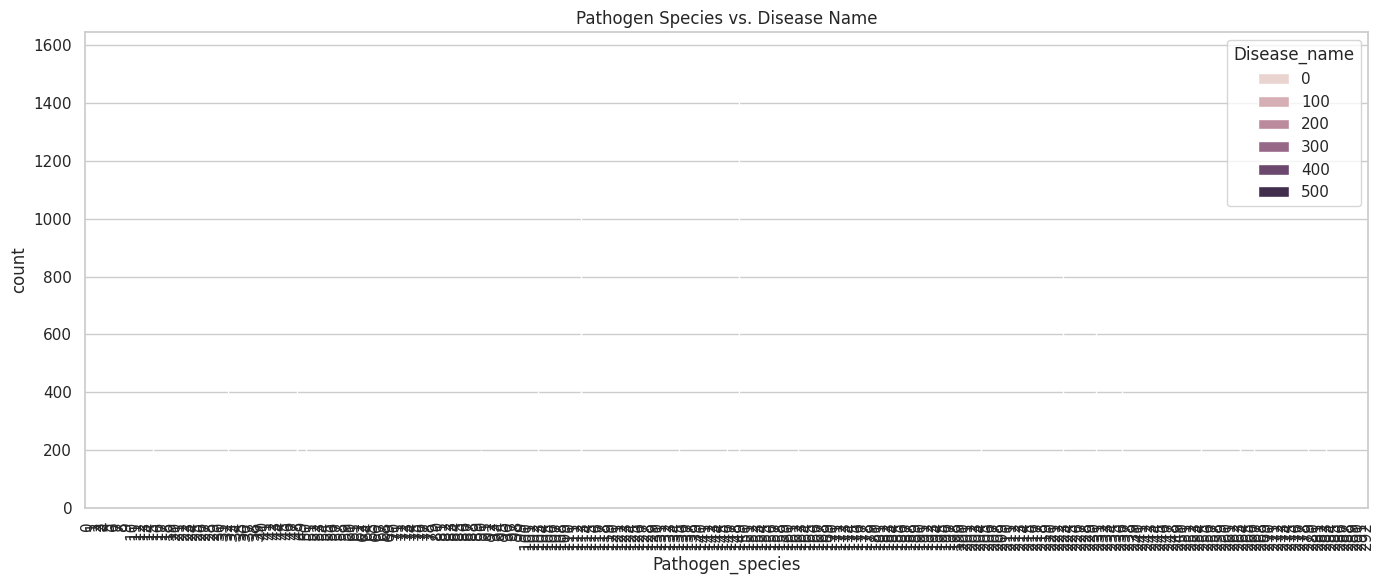

In [ ]:
# Assuming 'Pathogen_species' is the column (you may use encoded version)
plt.figure(figsize=(14, 6))
sns.countplot(data=df_cleaned, x='Pathogen_species', hue='Disease_name')
plt.title('Pathogen Species vs. Disease Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


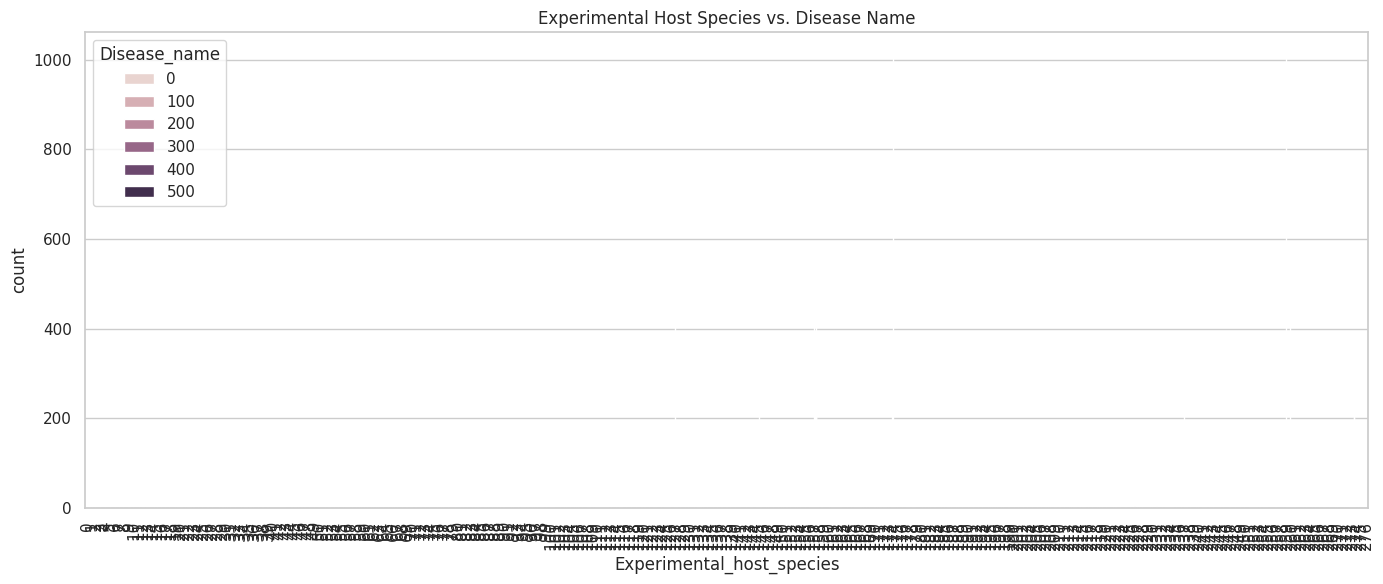

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_cleaned, x='Experimental_host_species', hue='Disease_name')
plt.title('Experimental Host Species vs. Disease Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


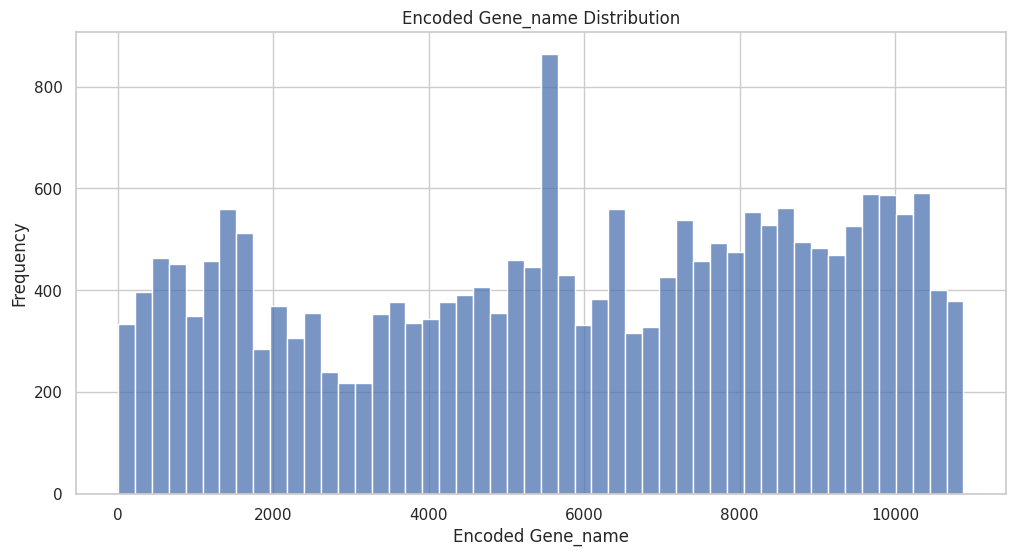

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Gene_name'], bins=50, kde=False)
plt.title('Encoded Gene_name Distribution')
plt.xlabel('Encoded Gene_name')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df_cleaned.drop('Disease_name', axis=1)
y = df_cleaned['Disease_name']


In [ ]:
# Count number of samples per disease
disease_counts = y.value_counts()
print(disease_counts[disease_counts < 2])  # Print classes with <2 samples


Disease_name
310    1
102    1
260    1
52     1
16     1
      ..
426    1
438    1
513    1
500    1
299    1
Name: count, Length: 106, dtype: int64


In [ ]:
# Get diseases with at least 2 samples
valid_diseases = disease_counts[disease_counts >= 2].index

# Filter the dataset
X_filtered = X[y.isin(valid_diseases)]
y_filtered = y[y.isin(valid_diseases)]

print(f"Filtered dataset shape: {X_filtered.shape}")


Filtered dataset shape: (21569, 15)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered,
    test_size=0.2,
    random_state=42,
    stratify=y_filtered
)


** Random Forest Classifier (Baseline)**

📊 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2
          12       0.99      0.97      0.98       217
          13       0.93      0.97      0.95       143
          15       0.89      0.94      0.91        33
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         3
          19       1.00      1.00      1.00         1
          20       0.89      1.00      0.94         8
          21       0.00      0.00      0.00         1
          22       1.00      1.00      1.00        21
          23       1.00      1.00      1.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

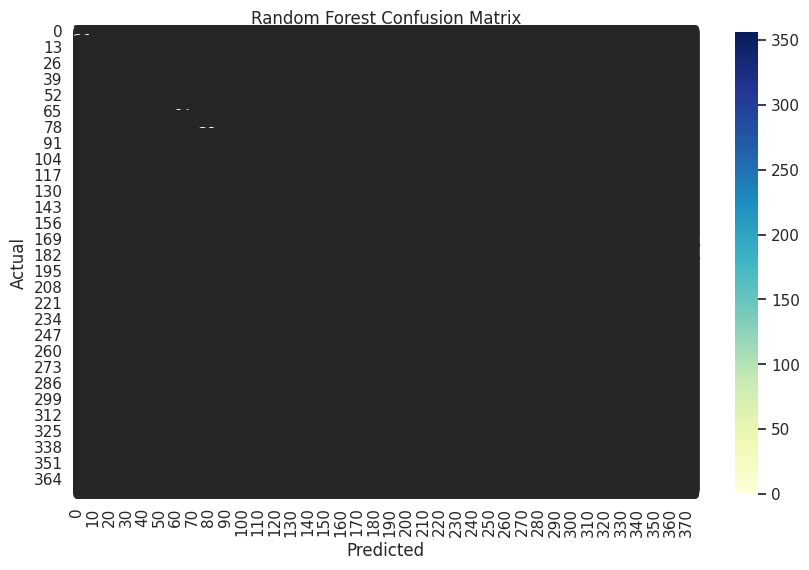

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
rf_preds = rf_model.predict(X_test)

# Evaluation
print("📊 Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))
print("✅ Accuracy:", accuracy_score(y_test, rf_preds))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit the encoder on the disease names (target variable)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now you can train your model using these encoded labels.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:22:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.58      0.97      0.72       217
           8       0.00      0.00      0.00       143
           9       0.00      0.00      0.00        33
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         1
          15       0.64      1.00      0.78        21
          16       0.00      0.00      0.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


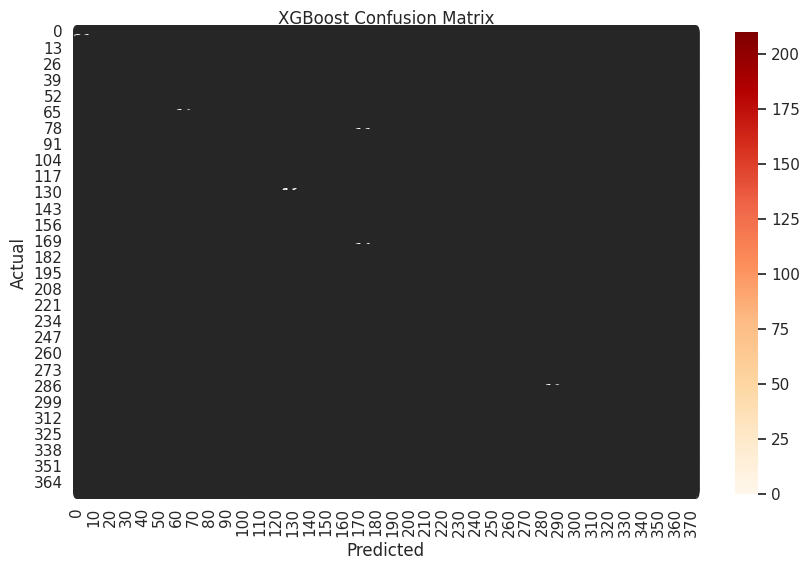

Predictions (Disease Names): [259 192 388 ... 145 428 192]


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model using encoded labels
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_encoded)

# Predict using the model
xgb_preds_encoded = xgb_model.predict(X_test)

# Convert predictions back to original disease names using the inverse transform
xgb_preds = label_encoder.inverse_transform(xgb_preds_encoded)

# Evaluation
print("📊 XGBoost Classification Report:")
print(classification_report(y_test_encoded, xgb_preds_encoded))
print("✅ Accuracy:", accuracy_score(y_test_encoded, xgb_preds_encoded))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_encoded, xgb_preds_encoded), annot=True, fmt='d', cmap='OrRd')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Map back predictions to disease names
print("Predictions (Disease Names):", xgb_preds)


In [ ]:
# For predictions
xgb_preds = label_encoder.inverse_transform(xgb_preds_encoded)

# For evaluation metrics
y_test_str = label_encoder.inverse_transform(y_test_encoded)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


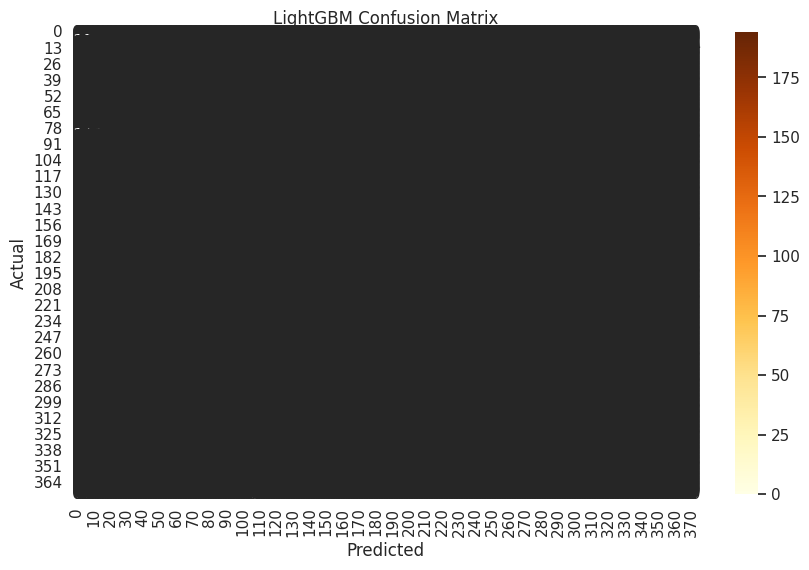

Predictions (Disease Names): [ 12 443  12 ... 357  12  12]


In [ ]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the target labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the LightGBM model using encoded labels
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train_encoded)

# Predict using the model
lgb_preds_encoded = lgb_model.predict(X_test)

# Convert the predictions back to original disease names
lgb_preds = label_encoder.inverse_transform(lgb_preds_encoded)

# Evaluation
print("📊 LightGBM Classification Report:")
print(classification_report(y_test_encoded, lgb_preds_encoded))
print("✅ Accuracy:", accuracy_score(y_test_encoded, lgb_preds_encoded))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_encoded, lgb_preds_encoded), annot=True, fmt='d', cmap='YlOrBr')
plt.title("LightGBM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Output the predictions in disease names
print("Predictions (Disease Names):", lgb_preds)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

📊 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.56      0.84      0.67       217
           8       0.28      0.31      0.29       143
           9       0.09      0.12      0.10        33
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00        21
          16       0.00      0.00   

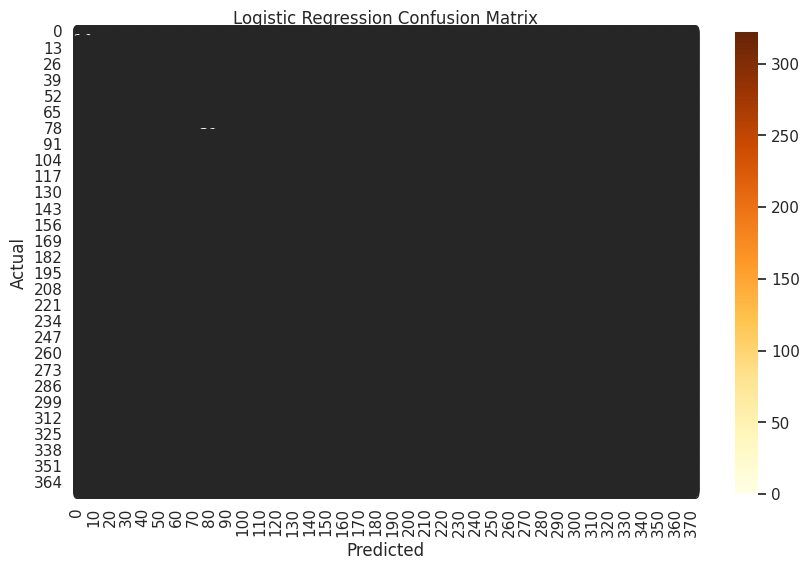

Predictions (Disease Names): [ 12 192  99 ... 353 428 273]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the target labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train_encoded)

# Predict using the model
logreg_preds_encoded = logreg_model.predict(X_test)

# Convert the predictions back to the original disease names
logreg_preds = label_encoder.inverse_transform(logreg_preds_encoded)

# Evaluation
print("📊 Logistic Regression Classification Report:")
print(classification_report(y_test_encoded, logreg_preds_encoded))
print("✅ Accuracy:", accuracy_score(y_test_encoded, logreg_preds_encoded))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_encoded, logreg_preds_encoded), annot=True, fmt='d', cmap='YlOrBr')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Output the predictions in disease names
print("Predictions (Disease Names):", logreg_preds)


📊 SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.09      0.67      0.16       217
           8       0.00      0.00      0.00       143
           9       0.00      0.00      0.00        33
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


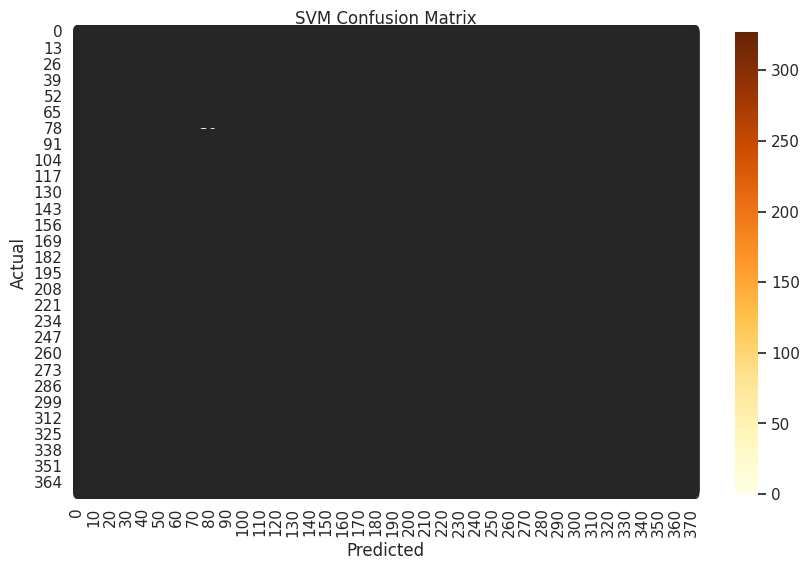

Predictions (Disease Names): [ 99  12  12 ...  12 428  12]


In [ ]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train_encoded)

# Predict using the model
svm_preds_encoded = svm_model.predict(X_test)

# Convert the predictions back to the original disease names
svm_preds = label_encoder.inverse_transform(svm_preds_encoded)

# Evaluation
print("📊 SVM Classification Report:")
print(classification_report(y_test_encoded, svm_preds_encoded))
print("✅ Accuracy:", accuracy_score(y_test_encoded, svm_preds_encoded))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_encoded, svm_preds_encoded), annot=True, fmt='d', cmap='YlOrBr')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Output the predictions in disease names
print("Predictions (Disease Names):", svm_preds)


📊 KNN Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.40      0.50      0.44         4
           4       1.00      1.00      1.00         1
           5       0.50      0.50      0.50         2
           6       1.00      0.50      0.67         2
           7       0.93      0.94      0.94       217
           8       0.88      0.88      0.88       143
           9       0.63      0.88      0.73        33
          10       0.50      1.00      0.67         1
          11       0.00      0.00      0.00         3
          12       0.25      1.00      0.40         1
          13       0.40      0.75      0.52         8
          14       0.00      0.00      0.00         1
          15       0.77      0.81      0.79        21
          16       0.67      0.50      0.57         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

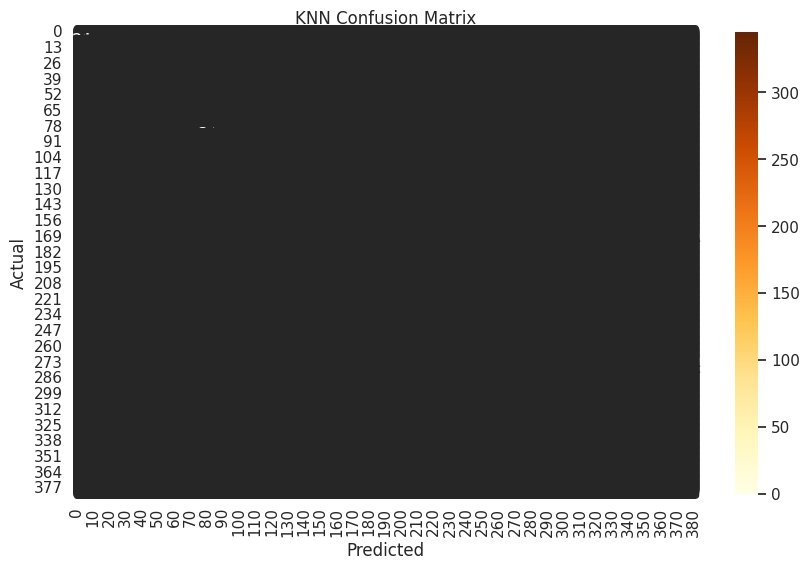

Predictions (Disease Names): [ 13 192 388 ... 489 428 124]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train_encoded)

# Predict using the model
knn_preds_encoded = knn_model.predict(X_test)

# Convert the predictions back to the original disease names
knn_preds = label_encoder.inverse_transform(knn_preds_encoded)

# Evaluation
print("📊 KNN Classification Report:")
print(classification_report(y_test_encoded, knn_preds_encoded))
print("✅ Accuracy:", accuracy_score(y_test_encoded, knn_preds_encoded))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_encoded, knn_preds_encoded), annot=True, fmt='d', cmap='YlOrBr')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Output the predictions in disease names
print("Predictions (Disease Names):", knn_preds)


<ipython-input-50-707e06d9b2f3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='YlOrBr')


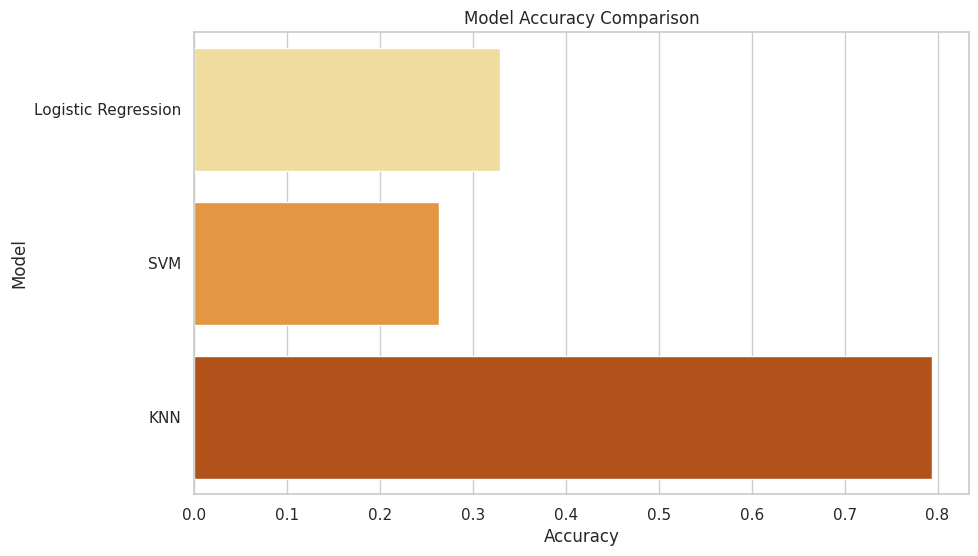

The model with the highest accuracy is: KNN with an accuracy of 0.7942


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Store the model names and their respective accuracies
models = ['Logistic Regression', 'SVM', 'KNN']
accuracies = [
    accuracy_score(y_test_encoded, logreg_preds_encoded),
    accuracy_score(y_test_encoded, svm_preds_encoded),
    accuracy_score(y_test_encoded, knn_preds_encoded)
]

# Create a DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

# Plot the accuracy of each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='YlOrBr')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

# Display the model with the highest accuracy
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"The model with the highest accuracy is: {best_model['Model']} with an accuracy of {best_model['Accuracy']:.4f}")


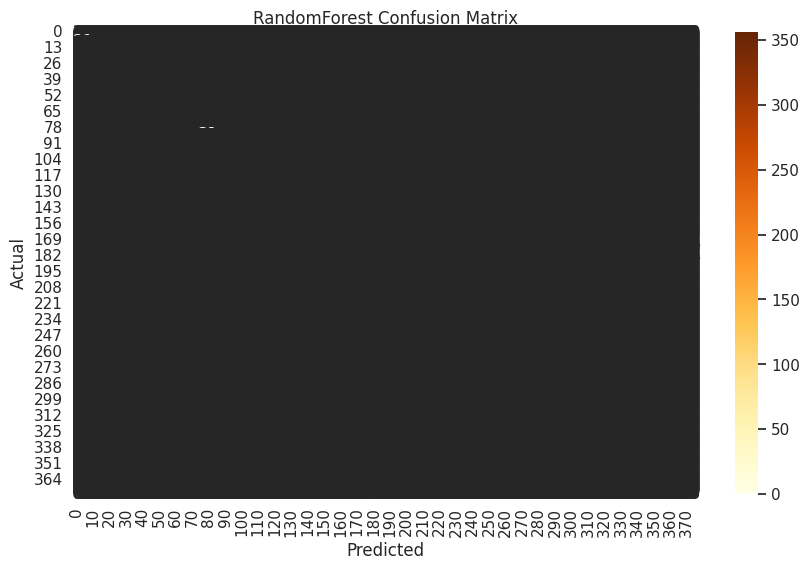

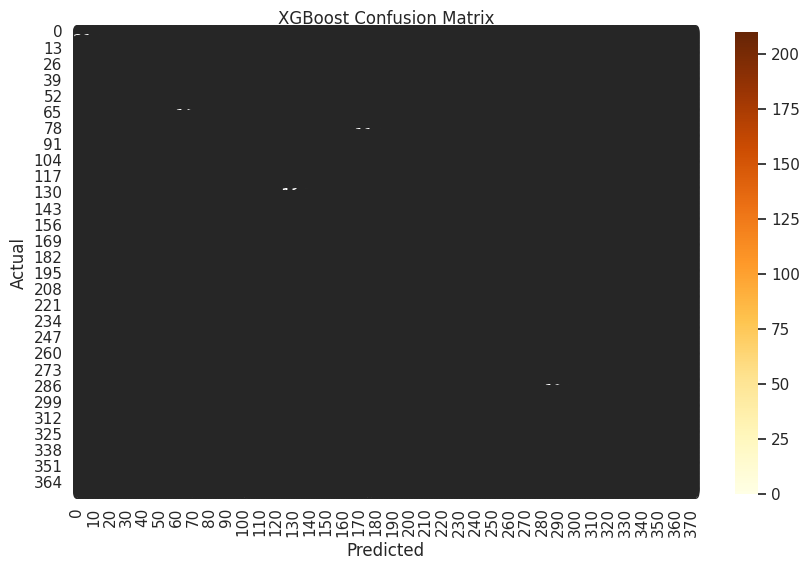

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


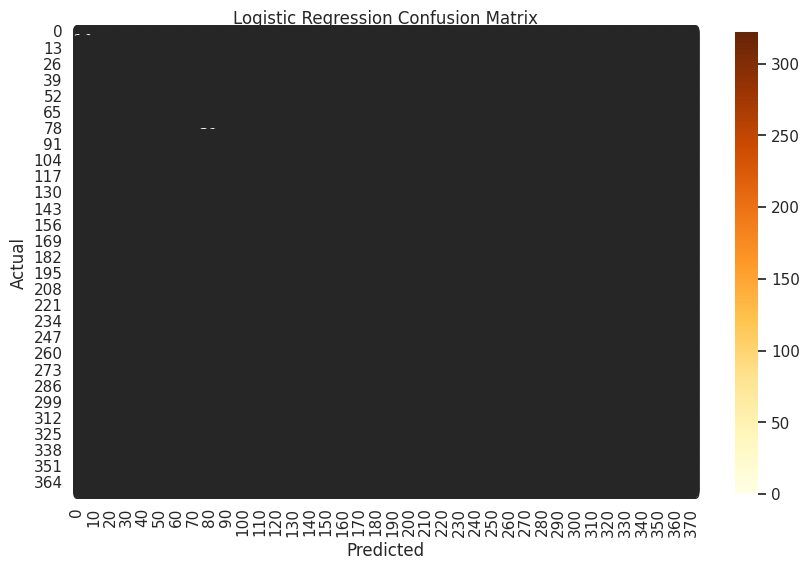

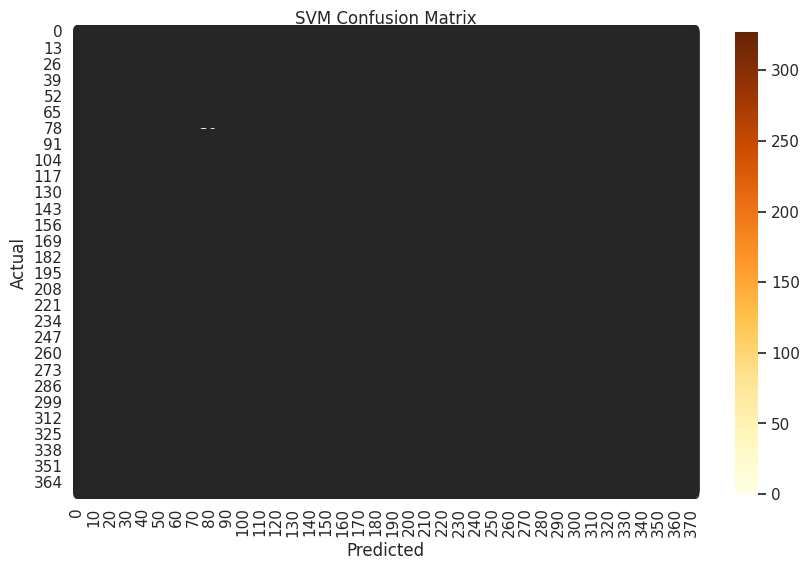

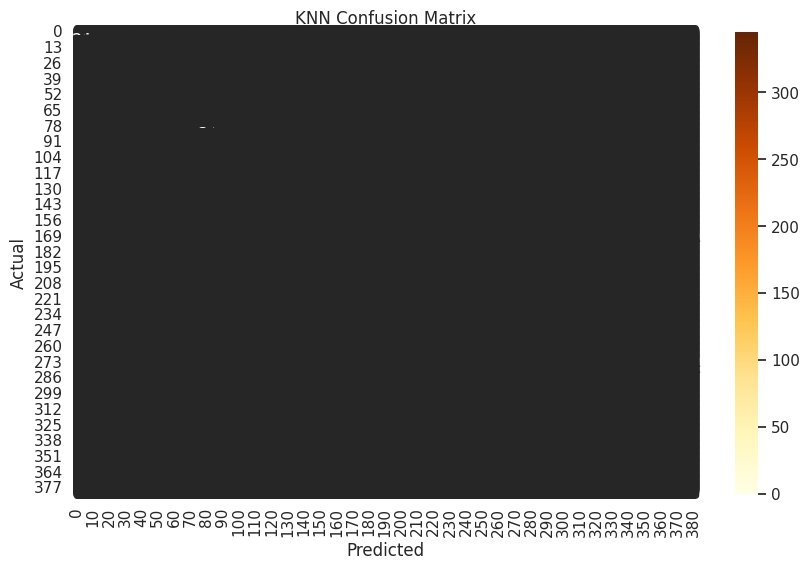

<ipython-input-51-c3351b25dbd8>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')


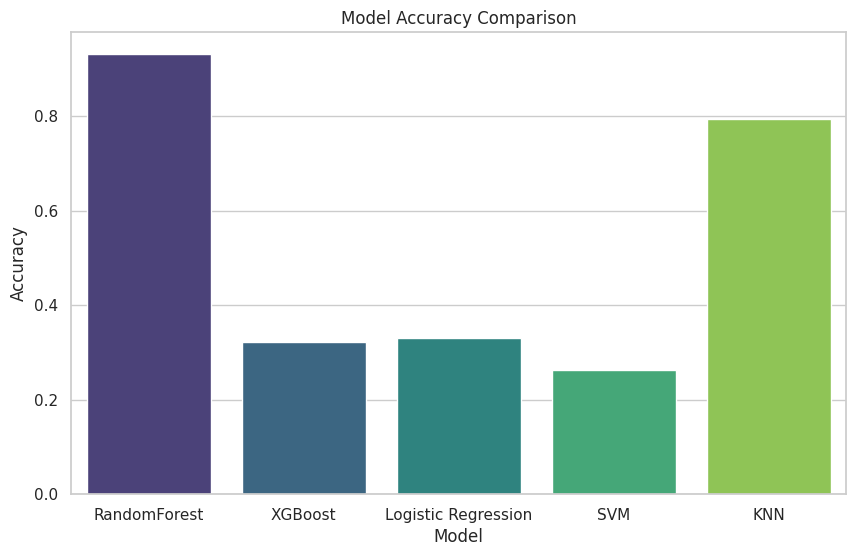

The model with the highest accuracy is: RandomForest with an accuracy of 0.9307


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Models initialization
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Dictionary to store results
model_accuracies = {}

# Training and predicting with each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train_encoded)

    # Predict the test set
    preds_encoded = model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test_encoded, preds_encoded)

    # Store the accuracy
    model_accuracies[model_name] = accuracy

    # Convert predictions back to disease names
    preds = label_encoder.inverse_transform(preds_encoded)

    # Display confusion matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test_encoded, preds_encoded), annot=True, fmt='d', cmap='YlOrBr')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plotting the comparison of accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

# Display the model with the highest accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"The model with the highest accuracy is: {best_model} with an accuracy of {model_accuracies[best_model]:.4f}")


In [ ]:
import joblib

# Assuming RandomForest is the model with the highest accuracy and is already trained
# Save the RandomForest model
joblib.dump(rf_model, 'random_forest_model.pkl')

print("RandomForest model saved successfully!")


RandomForest model saved successfully!


In [ ]:
df_cleaned.head()

,Gene_name,ProteinID,GeneLocusID,Function,Phenotype_of_mutant,Essential_gene_Lethal_knockout,experimental_evidence,Pathogen_species,Pathogen_NCBI_species_Taxonomy ID,Pathogen_NCBI_strain_Taxonomy_ID,Host_descripton,Experimental_host_species,Host_NCBI_Taxonomy_ID,Host_strain_genotype (MOVED this to new col 03/10/2016_or cultivar_taxonomy_ID_NCBI),tissue_type,Disease_name
0,4826,6255,155,414,8,0,1,25,5017,449239,1,273,4577,49,437,302
1,245,6235,4608,412,2,0,0,109,5499,449239,0,234,4081,49,437,295
2,3394,6608,105,1936,6,0,74,25,5017,449239,26,273,4577,49,437,302
3,89,6094,191,3772,7,0,77,90,5207,235443,29,42,6239,49,437,177
4,89,6094,191,3772,6,0,77,90,5207,235443,32,172,9986,49,437,177


In [50]:
print(df.columns.tolist())


['Gene_name', 'ProteinID', 'GeneLocusID', 'Function', 'Phenotype_of_mutant', 'Essential_gene_Lethal_knockout', 'experimental_evidence', 'Pathogen_species', 'Pathogen_NCBI_species_Taxonomy ID', 'Pathogen_NCBI_strain_Taxonomy_ID', 'Host_descripton', 'Experimental_host_species', 'Host_NCBI_Taxonomy_ID', 'Host_strain_genotype (MOVED this to new col 03/10/2016_or cultivar_taxonomy_ID_NCBI)', 'tissue_type', 'Disease_name']


In [51]:
# Split features and label correctly
X = df.drop('Disease_name', axis=1)
y = df['Disease_name']


📊 Voting Classifier Report:
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       190
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7
           5       0.80      0.80      0.80         5
           6       1.00      0.75      0.86         4
           7       0.00      0.00      0.00         0
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         2
          12       0.97      0.94      0.96        35
          13       1.00      1.00      1.00         1
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         1
          17       1.00      0.97      0.98        30
          18       1.00      0.67      0.80         3

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

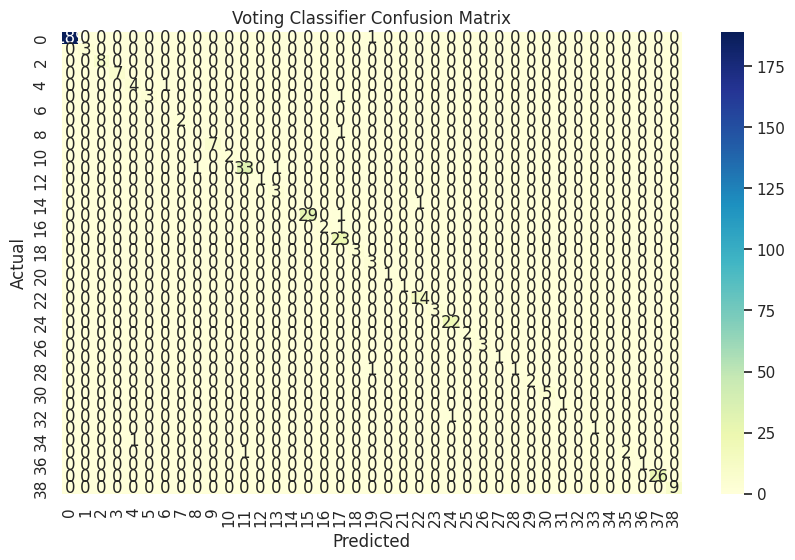

In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define base models
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Create Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(estimators=[
    ('knn', knn),
    ('rf', rf)
], voting='soft')  # use 'hard' if your models don't support predict_proba

# 3. Fit model
voting_clf.fit(X_train, y_train)

# 4. Predict
voting_preds = voting_clf.predict(X_test)

# 5. Evaluation
print("📊 Voting Classifier Report:")
print(classification_report(y_test, voting_preds))
voting_accuracy = accuracy_score(y_test, voting_preds)
print("✅ Accuracy:", voting_accuracy)

# 6. Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, voting_preds), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Voting Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Let's Build a hybrid model

In [54]:
#Import Required Libraries
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#Initialize Individual Models

# Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# K-Nearest Neighbors model
knn_clf = KNeighborsClassifier()

In [57]:
#Create a Voting Classifier (Soft Voting)

# Hybrid model with soft voting
voting_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('knn', knn_clf)],
    voting='soft'
)


In [58]:
#Fit the Model on Training Data

voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [60]:
#Make prediction
voting_preds = voting_clf.predict(X_test)


Hybrid Model (RandomForest + KNN) Report:
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       190
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7
           5       0.80      0.80      0.80         5
           6       1.00      0.75      0.86         4
           7       0.00      0.00      0.00         0
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         2
          12       0.97      0.94      0.96        35
          13       1.00      1.00      1.00         1
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         1
          17       1.00      0.97      0.98        30
          18       1.00      0.67      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

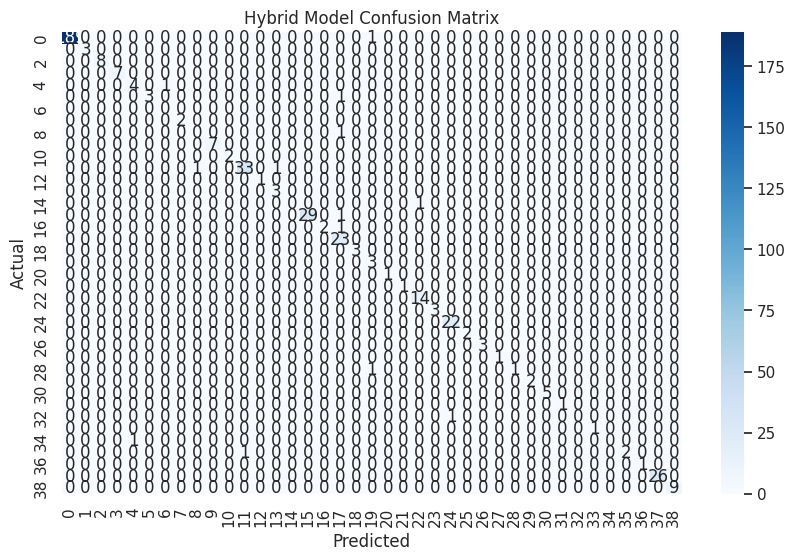

In [61]:
#Evaluate the Hybrid Model

print("Hybrid Model (RandomForest + KNN) Report:")
print(classification_report(y_test, voting_preds))
print("Accuracy:", accuracy_score(y_test, voting_preds))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, voting_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Hybrid Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [62]:
import joblib

# Save the trained hybrid model
joblib.dump(voting_clf, 'hybrid_model_rf_knn.pkl')

print("✅ Hybrid model saved as 'hybrid_model_rf_knn.pkl'")


✅ Hybrid model saved as 'hybrid_model_rf_knn.pkl'


Load the Hybrid Model and Required Encoders

In [64]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Store encoders in a dictionary
label_encoders = {}

# Encode only categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Save all encoders to a single file
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']

In [65]:
label_encoders = joblib.load('label_encoders.pkl')


In [69]:
import joblib
import numpy as np

# Load the saved hybrid model
voting_clf = joblib.load('hybrid_model_rf_knn.pkl')

# Optional: Load encoder and scaler if you used them during training
label_encoder = joblib.load('label_encoders.pkl')  # If used



In [70]:
features = ['Gene_name', 'ProteinID', 'Function', 'Pathogen_species', 'Host_descripton', 'tissue_type']


In [71]:
# Example input values (same order as training features)
sample_input = {
    'Gene_name': 'PGN1',
    'ProteinID': 'P26215',
    'Function': 'Endopolygalacturonase',
    'Pathogen_species': 'Bipolaris zeicola',
    'Host_descripton': 'Monocots',
    'tissue_type': 'leaf'
}


In [82]:
from sklearn.preprocessing import StandardScaler
import joblib
import pandas as pd

# Assuming you already have the training data 'X_train' used for training the model
# Fit a scaler on the training data (assuming numerical features in 'X_train')
scaler = StandardScaler()
scaler.fit(X_train)  # Fit on the training data

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [84]:
# Example of corrected feature names from training dataset
sample_input = {
    'Essential_gene_Lethal_knockout': 1,  # Example feature value
    'Another_feature': 3.4,               # Another feature
    'Some_categorical_feature': 'Value',  # A categorical feature
    # Add other features as required, all matching training set
}

# Convert the input data to a DataFrame
sample_df = pd.DataFrame([sample_input])

# Encode categorical columns using label encoders
for col in sample_df.columns:
    if sample_df[col].dtype == 'object' and col in label_encoders:
        try:
            sample_df[col] = label_encoders[col].transform(sample_df[col])
        except ValueError as e:
            print(f"Unseen label encountered in column {col}. Handling error...")
            sample_df[col] = label_encoders[col].classes_[0]  # Default to the first class

# Apply scaling to the data
sample_df_scaled = scaler.transform(sample_df)

# Make predictions
prediction = voting_clf.predict(sample_df_scaled)

# Convert the predicted label back to the original label using inverse transform
predicted_disease = label_encoders['Disease'].inverse_transform(prediction)

# Output the predicted disease
print(f"🦠 Predicted Disease: {predicted_disease[0]}")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Another_feature
- Some_categorical_feature
Feature names seen at fit time, yet now missing:
- Experimental_host_species
- Function
- GeneLocusID
- Gene_name
- Host_NCBI_Taxonomy_ID
- ...
